这几天在家做了Fibonacci火锅, 

今天的火锅汤=昨天的火锅汤+前天的火锅汤. 对了, 剩下的火锅汤还可以做成浓汤宝, 大火收汁差不多以后倒入冰盒中冷藏或冷冻即可. 

于是突然想起来以前学过如何求Fibonacci数列的通项公式. 很华丽的. 不记下来可惜了. 先当作是LaTeX和sympy的练习吧

<!-- TEASER_END -->

# 母函数

Generating Function, 定义是这样的: 

$$
G(x)=\sum_{i=0}^{\infty} a_i x^i
$$

其中每一项的系数$$a_i$$就是一个数列$$\{a_i\}$$的第i项. (注意要加到无穷去)

# Fibonacci数列
定义大家都很清楚了: 
$$
a_i=a_{i-1}+a_{i-2}
$$
其中
$$
a_0 = 0, a_1 = 1 , a_2 = 1
$$


# 利用数列定义求解母函数

一般的技巧就是利用数列定义中的等式, 凑出能够相减的东西. 

$$
G(x) = a_0 x^0 + a_1 x^1 + a_2 x^2  + a_3 x^3  + a_4 x^4 ...=\sum_{i=0}^{\infty} a_i x^i
$$

把前两项写出来: 

$$
G(x) = a_0 x^0 + a_1 x^1 + a_2 x^2  + a_3 x^3  + a_4 x^4 ...=a_0 x^0 + a_1 x^1 + \sum_{i=2}^{\infty} a_i x^i
$$

然后去凑等式, 两边都乘x, 注意变成了a的下标比x的指数小1: 

$$
x G(x) = a_0 x^1 + a_1 x^2 + a_2 x^3  + a_3 x^4  + a_4 x^5 ... = a_0 x^1 + \sum_{i=2}^{\infty} a_{i-1} x^i
$$

一个不够, 再凑一个, 注意变成了a的下标比x的指数小2: 

$$
x^2 G(x) =a_0 x^2 + a_1 x^3 + a_2 x^4  + a_3 x^5  + a_4 x^6 ... = \sum_{i=2}^{\infty} a_{i-2} x^i
$$

然后用第一个式子减去第二, 第三个式子: 

$$
G(x)-x G(x)-x^2 G(x) = a_0 x^0 + a_1 x^1 + \sum_{i=2}^{\infty} a_i x^i - (a_0 x^1 + \sum_{i=2}^{\infty} a_{i-1} x^i) - \sum_{i=2}^{\infty} a_{i-2} x^i
$$

左边有G(x)是可以提出来的, 右边x的指数相同的部分可以加减. 

$$
(1-x-x^2) G(x) = a_0 x^0 + a_1 x^1 - a_0 x^1 + (\sum_{i=2}^{\infty} a_i x^i - \sum_{i=2}^{\infty} a_{i-1} x^i - \sum_{i=2}^{\infty} a_{i-2} x^i) 
$$

$$
(1-x-x^2) G(x) = a_0 x^0 + a_1 x^1 - a_0 x^1 + \sum_{i=2}^{\infty} (a_i-a_{i-1}-a_{i-2}) x^i 
$$

代入Fibonacci的通项公式, 和第0项, 第一项的值

$$
(1-x-x^2) G(x) = 0 x^0 + 1 x^1 - 0 x^1 +  \sum_{i=2}^{\infty} 0 x^i 
$$

化简, 求出G(x)

$$
G(x)=\frac{x}{1-x-x^2}
$$

# 利用母函数展开求解通项公式

## Talyor展开的方式

其实解出

$$
G(x)=\frac{x}{1-x-x^2}
$$

就已经解出了通项公式了. 因为其实就是Taylor series. 

$$
G(a)=G(a)+\frac{G'(a)}{1!}(x-a)+\frac{G''(a)}{2!}(x-a)^2+\frac{G'''(a)}{3!}(x-a)^3...
$$

当a=0时, 
通项就是

$$
a_i = \frac{G^{(n)}(0)}{n!}x^n
$$

In [1]:
from sympy import *
import numpy as np
from sympy import init_printing
init_printing()  #为了美化输出

In [2]:
def fib(n):
    x=symbols("x")
    G=x/(1-x-x**2)
    return (diff(G,x,n)/np.math.factorial(n)).subs(x,0)

print([fib(n) for n in range(10)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [3]:
# 或者调用sympy的级数函数
def fib_series(n):
    x=symbols("x")
    G=x/(1-x-x**2)
    return (G.series(x,0,n))
fib_series(10)  

## 利用级数

不过多数情况下不这么干, 还是有不用求导求阶乘的方式. 

已知有特殊函数的Taylor展开式: 

$$
\frac{1}{1-ax}=1+ax+a^2x^2+...
$$

这个好像在母函数里经常用的. 总是把一个母函数表示成上述多个级数之和. 也就是求解A,B,α,β使得: 

$$
G(x)=\frac{x}{1-x-x^2}=\frac{A}{1-\alpha x}+\frac{B}{1-\beta x}
$$

那么G(x)就可以分别展开成

$$
G(x)= A (1+\alpha x+\alpha^2x^2+...)+B (1+\beta x+\beta^2x^2...)
$$

通项公式就等于
$$
a_n=A \alpha^n+B \beta^n
$$

当然可以通过乘法和对比系数求解A,B,α,β, 但对于我这么懒的人, 反正要求解4个参数, 而且对与任意x都成立, 就直接把x=1,2,3,4代入求解了

In [4]:
A,B,α,β,x,n=symbols("A B α β x n")
G_left=x/(1-x-x**2)
G_right=A/(1-α*x)+B/(1-β*x)

In [5]:
zero=G_left-G_right
result=solve([zero.subs(x,1),zero.subs(x,2),zero.subs(x,3),zero.subs(x,4)],[A,B,α,β])

subdict={k:v for (k,v) in zip([A,B,α,β],result[0])}
print(subdict)


{α: -sqrt(5)/2 + 1/2, β: 1/2 + sqrt(5)/2, A: -sqrt(5)/5, B: sqrt(5)/5}


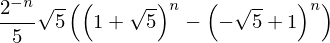

In [6]:

a_n=simplify((A*α**n+B*β**n).subs(subdict))
a_n

In [7]:
def fib_G(i):
    return simplify(a_n.subs(n,i))
print([fib_G(i) for i in range(10)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


# 参考课程

组合数学: 
http://www.xuetangx.com/courses/course-v1:TsinghuaX+60240013X+sp/info